In [1]:
import pandas as pd

# Regression example
def get_data():
    #get train data
    train_data_path ="train.csv"
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ="test.csv"
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train.SalePrice
  train.drop(['SalePrice'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index', 'Id'], inplace=True, axis=1)
  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [2]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [3]:
# Drop missing values
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

# Call the function
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [4]:
# How many columns we got
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


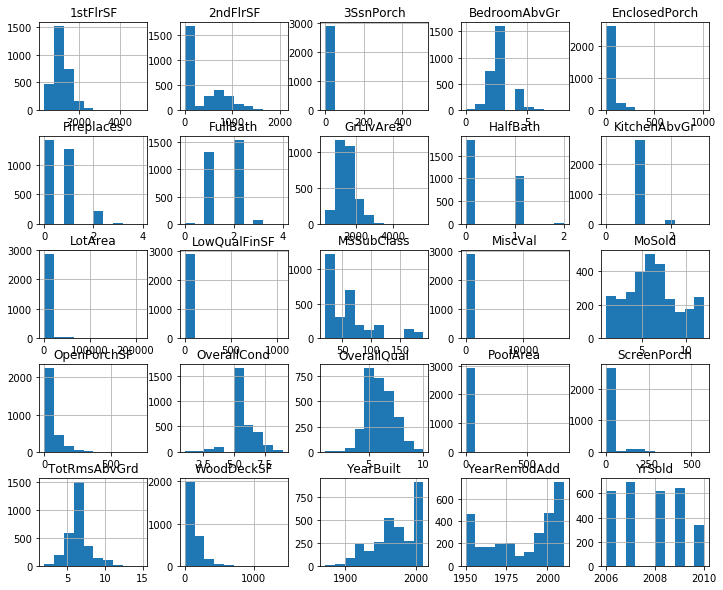

In [6]:
import matplotlib.pyplot as plt
# Plot the variables
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

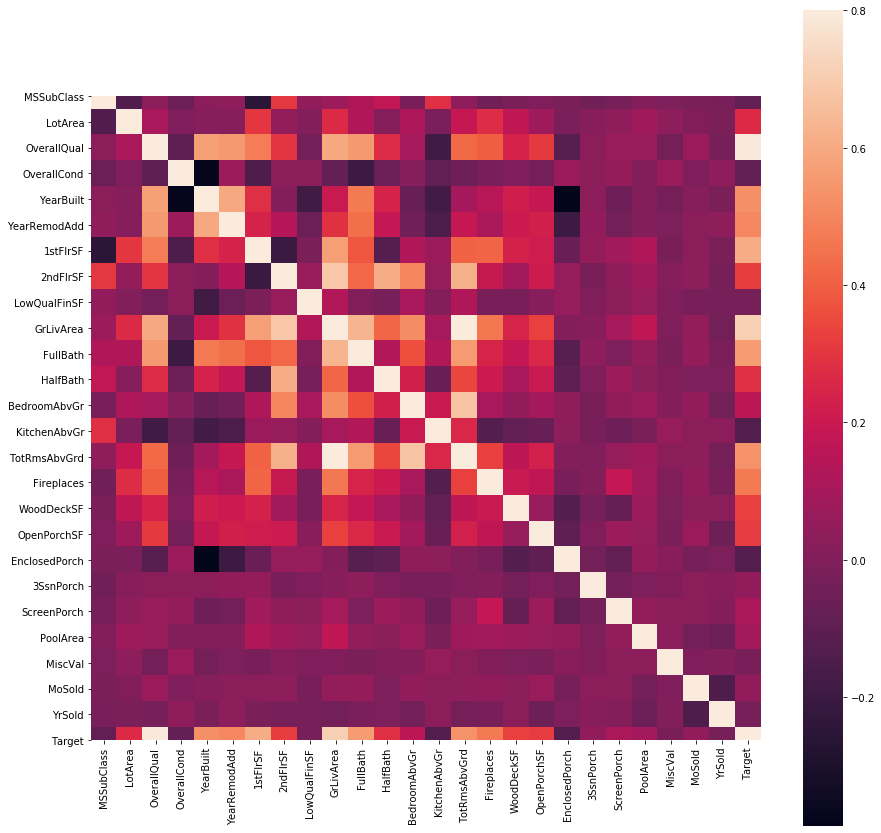

In [7]:
import seaborn as sb
# How many of features are correlated
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()
# Looks like 15 correlated features

In [8]:
import numpy as np
# We will encode the categorical features using one hot encoding.
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [9]:
# Split data to train and test
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 
  
train, test = split_combined()

In [10]:
from keras.layers import Input, Dense
from keras import Sequential

# Use ‘relu’ as the activation function for the hidden layers
# Use a ‘normal’ initializer as the kernal_intializer

#Define the output layer with only one node
#Use ‘linear ’as the activation function for the output layer
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               19200     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.callbacks import ModelCheckpoint 
# Define a checkpoint to save the data 
checkpoint_name = "C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Assignment 7/Weights-{epoch:03d}--{val_loss:.5f}.hdf5" 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto') 
callbacks_list = [checkpoint] 
# Train the model
hist=NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list) 


Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 226us/step - loss: 135308.9073 - mean_absolute_error: 135308.9219 - val_loss: 54208.8764 - val_mean_absolute_error: 54208.8750

Epoch 00001: val_loss improved from inf to 54208.87644, saving model to C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Assignment 7/Weights-001--54208.87644.hdf5
Epoch 2/500
1168/1168 [==============================] - 0s 61us/step - loss: 53289.3379 - mean_absolute_error: 53289.3359 - val_loss: 47236.9735 - val_mean_absolute_error: 47236.9766

Epoch 00002: val_loss improved from 54208.87644 to 47236.97351, saving model to C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Assignment 7/Weights-002--47236.97351.hdf5
Epoch 3/500
1168/1168 [==============================] - 0s 65us/step - loss: 44682.7938 - mean_absolute_error: 44682.7930 - val_loss: 43626.5685 - val_mean_absolute_error: 43626.5703

Epoch 00003: val_loss improved from 47236.97351 to 43

In [13]:
 # Load wights file of the best model : 
wights_file = "C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Assignment 7/Weights-403--17746.95409.hdf5" 
# choose the best checkpoint 
NN_model.load_weights(wights_file) 
# load it 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [14]:
# Make predictions
predictions = NN_model.predict(test)

In [15]:
predictions

array([[116944.125],
       [174892.39 ],
       [173560.6  ],
       ...,
       [159820.02 ],
       [137280.55 ],
       [209997.06 ]], dtype=float32)

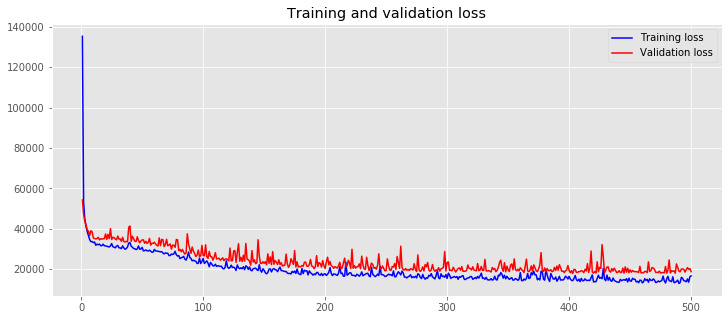

In [16]:
plt.style.use('ggplot')

def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_history(hist)

In [18]:
import keras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience= 20)
callbacks_list= ModelCheckpoint("C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Assignment 7/Weights-{epoch:03d}--{val_loss:.5f}.hdf5", monitor='val_loss', save_best_only = True)
callbacks = [early_stop, callbacks_list]

In [19]:
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)
#When we change the 'patience' to 20, we get the model 20 epochs
#after the best model; when the 'patience' was 50, we got the model 50
#epochs after the best model.

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 153us/step - loss: 17249.4372 - mean_absolute_error: 17249.4355 - val_loss: 19525.5977 - val_mean_absolute_error: 19525.5977
Epoch 2/500
1168/1168 [==============================] - 0s 74us/step - loss: 14857.1839 - mean_absolute_error: 14857.1836 - val_loss: 18268.9235 - val_mean_absolute_error: 18268.9238
Epoch 3/500
1168/1168 [==============================] - 0s 90us/step - loss: 13620.2831 - mean_absolute_error: 13620.2832 - val_loss: 19020.6361 - val_mean_absolute_error: 19020.6348
Epoch 4/500
1168/1168 [==============================] - 0s 73us/step - loss: 14408.8135 - mean_absolute_error: 14408.8115 - val_loss: 17940.9669 - val_mean_absolute_error: 17940.9668
Epoch 5/500
1168/1168 [==============================] - 0s 66us/step - loss: 17230.9458 - mean_absolute_error: 17230.9473 - val_loss: 21877.2498 - val_mean_absolute_error: 21877.2520
Epoch 6/500
1168/1168 [=========

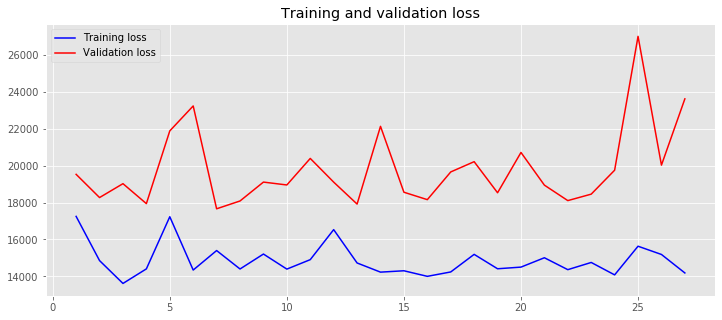

In [20]:
plot_history(hist)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
train_X, val_X, train_y, val_y = train_test_split(train, target, test_size = 0.25, random_state = 14)
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  18158.610465753427


In [ ]:
#You can compare the NN regression model to a Random Forest model to analyze performance